# Thêm thư viện

In [1]:
import librosa
import librosa.feature
import numpy as np
import matplotlib.pyplot as plt

# Đọc file âm thanh

In [2]:
y, sr = librosa.load('../data/i.wav', sr=None)

# Loại bỏ frame không phù hợp

In [3]:
def strip(y: np.ndarray, threshold=0.005, frame_length=30, hop_length=15) -> np.ndarray:
    # Tính RMSE
    rmse = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length, center=True)

    # Tạo danh sách các frame mà RMSE >= ngưỡng
    valid_frames = np.where(rmse[0] >= threshold)[0]

    # Nếu không có frame nào thỏa mãn, trả về mảng trống
    if len(valid_frames) == 0:
        return []

    # Tính các chỉ số sample tương ứng với các frame đầu và cuối hợp lệ
    start_sample_index = librosa.frames_to_samples(valid_frames[0], hop_length=hop_length)
    end_sample_index = librosa.frames_to_samples(valid_frames[-1] + 1, hop_length=hop_length)

    # Trả về đoạn âm thanh sau khi loại bỏ các frame không hợp lệ
    return y[start_sample_index:end_sample_index]

In [4]:
y_cleaned = strip(y)

# Biểu đồ

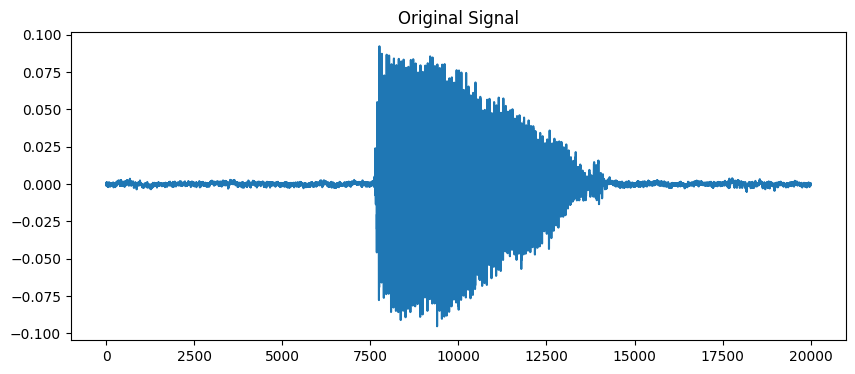

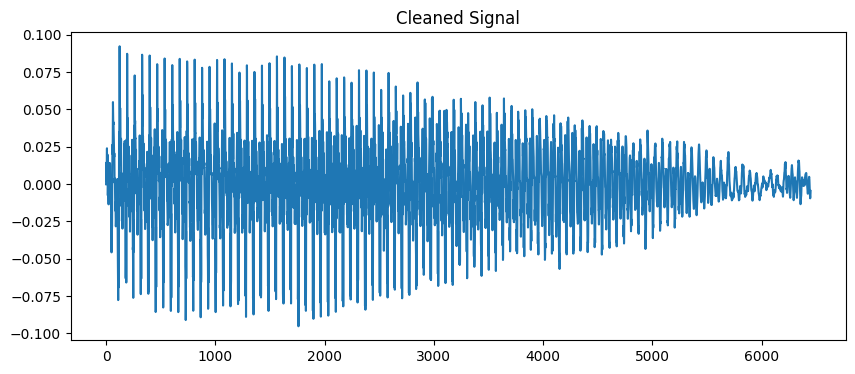

In [5]:
# Vẽ tín hiệu gốc
plt.figure(figsize=(10, 4))
plt.plot(y, label='Original Signal')
plt.title('Original Signal')
plt.show()

# Vẽ tín hiệu sau khi loại bỏ
plt.figure(figsize=(10, 4))
plt.plot(y_cleaned, label='Cleaned Signal')
plt.title('Cleaned Signal')
plt.show()

# Hàm tự tương quan

In [6]:
def autocorrelation(signal):
    result = np.correlate(signal, signal, mode='full')
    mid = len(result) // 2
    return result[mid:]

def find_f0(signal, sr, min_freq=50, max_freq=500):
    ac = autocorrelation(signal)
    # Xác định chỉ số của độ trễ (delay) tương ứng với tần số cơ bản
    ac = ac[int(sr / max_freq):]
    # Tìm chỉ số của độ trễ tối đa
    peak = np.argmax(ac)
    # Tính F0 từ chỉ số độ trễ
    f0 = sr / (peak + int(sr / max_freq))
    
    # Nếu F0 nằm ngoài khoảng cho phép, trả về NaN
    if f0 < min_freq or f0 > max_freq:
        return np.nan
    
    return f0

In [7]:
f0 = find_f0(y_cleaned, sr)
print("F0:", f0)

F0: 235.2941176470588
